# Titanic Disaster Analysis

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On 15th april 1912, the widely considered “unsinkable” Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of passengers and crew members.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this Datasets, we will try to build a predictive model which help to understand and analysis of this Disaster.

# Import Libraries

Let's import some Libraries.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data

Start by reading in the train.csv file into a pandas dataframe.

In [73]:
titanic_train = pd.read_csv(r"C:\Users\Jayesh More\Downloads\train.csv")

In [74]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

Start some exploratory data analysis for checking out missing data.

In [75]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

False = filled cells                                                                                                             
True = empty cells

In [77]:
titanic_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Sum of null values in perticular column

In [78]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Used seaborn to create a simple countplot of survived and died.                                                         
0 = died                                                                                                                 
1 = survived 

<Axes: xlabel='Survived', ylabel='count'>

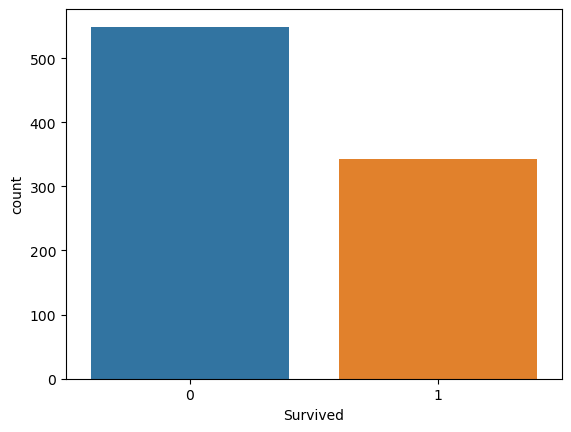

In [37]:
sns.countplot(x='Survived',data=titanic_train)

In [92]:
count_male=titanic_train['Sex']=="male"
count_male.sum()

577

In [93]:
count_female=titanic_train['Sex']=="female"
count_female.sum()

314

In [94]:
total_presented=len(titanic_train)
total_presented

891

Here we are showing male and female ratio by countplot.

<Axes: xlabel='Sex', ylabel='count'>

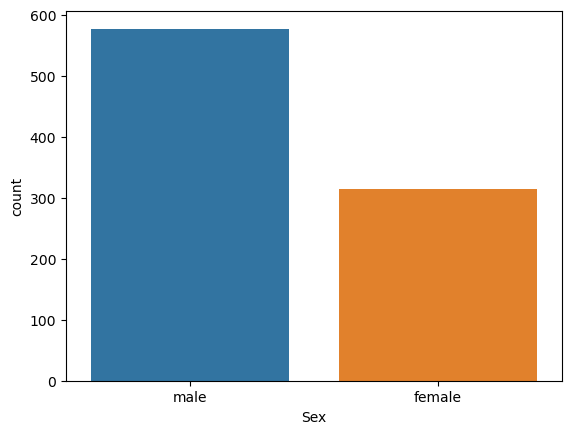

In [79]:
sns.countplot(x='Sex',data=titanic_train)

Here, below some mathematical calculation as per the data.

In [95]:
male_presented=(count_male.sum()/total_presented)*100
print("percentage of male presented:", male_presented)

percentage of male presented: 64.75869809203144


In [96]:
female_presented=(count_female.sum()/total_presented)*100
print("percentage of female presented:", female_presented)

percentage of female presented: 35.24130190796858


In [4]:
male_survived_percentage = titanic_train[titanic_train['Sex'] == 'male']['Survived']
percentage_male_survived = male_survived_percentage.mean() * 100
print(f"Percentage of males who survived: {percentage_male_survived:.2f}%")

Percentage of males who survived: 18.89%


In [6]:
female_survived_percentage = titanic_train[titanic_train['Sex'] == 'female']['Survived']
percentage_female_survived = female_survived_percentage.mean() * 100
print(f"Percentage of females who survived: {percentage_female_survived:.2f}%")

Percentage of females who survived: 74.20%


Percentage of male and female survived by countplot.                                                                              we clearly seen that maximum(81) male were died and mininum(19) male survived and maximum(74) female were survived and minimum(26) female died.


<Axes: xlabel='Survived', ylabel='count'>

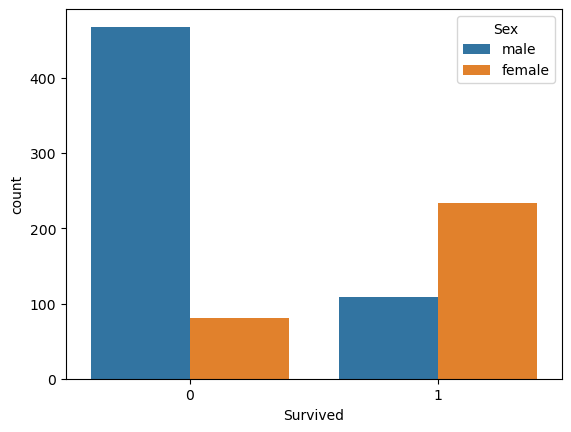

In [40]:
sns.countplot(x='Survived',hue='Sex',data=titanic_train)

As per the data there are three categories.                                                                                                                                                                         
1= first class(rich) /                                                                                                            2= second class(middle) /                                                                                                       3= third class(lower middle) - maximum people present form this categories.

<Axes: xlabel='Pclass', ylabel='count'>

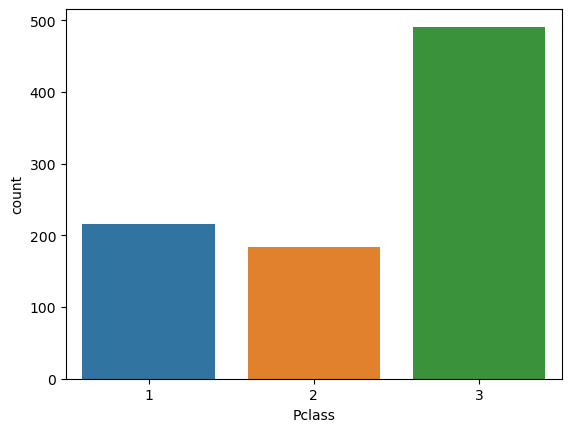

In [41]:
sns.countplot(x='Pclass',data=titanic_train)

From this below graph we clearly see that maximum people were died from third class categories especially male.

<Axes: xlabel='Pclass', ylabel='count'>

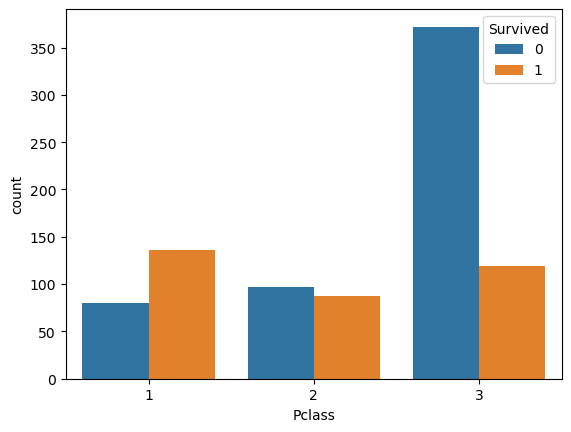

In [46]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_train)

From this below graph we see the ratio of male and female with respect to classes.

<Axes: xlabel='Pclass', ylabel='count'>

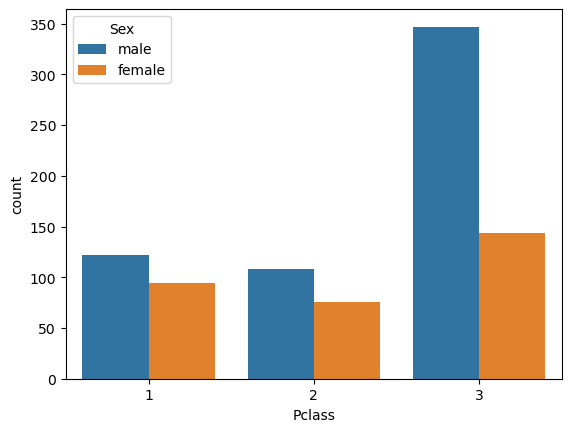

In [43]:
sns.countplot(x='Pclass',hue='Sex',data=titanic_train)

As per the data we see here, there are some people who come with there sibling and spouse.

<Axes: xlabel='SibSp', ylabel='count'>

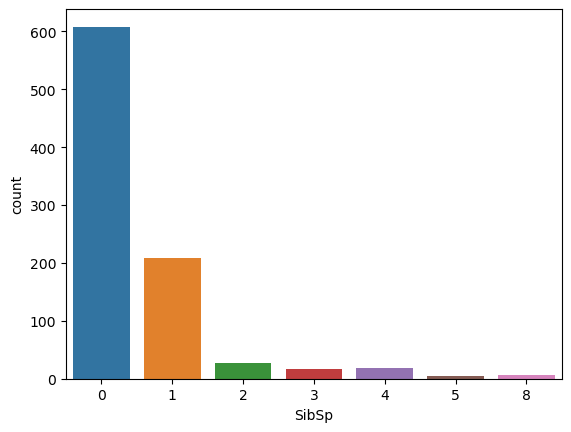

In [31]:
sns.countplot(x='SibSp',data=titanic_train)

Average fare as per the passenger classes.

(0.0, 100.0)

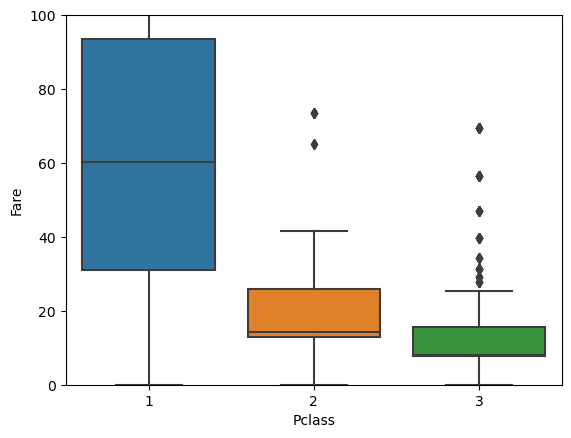

In [59]:
sns.boxplot(x='Pclass',y='Fare',data=titanic_train)
plt.ylim(0,100)

As per the below graph we see that maximum people age is between 20-30.

<Axes: xlabel='Age', ylabel='Count'>

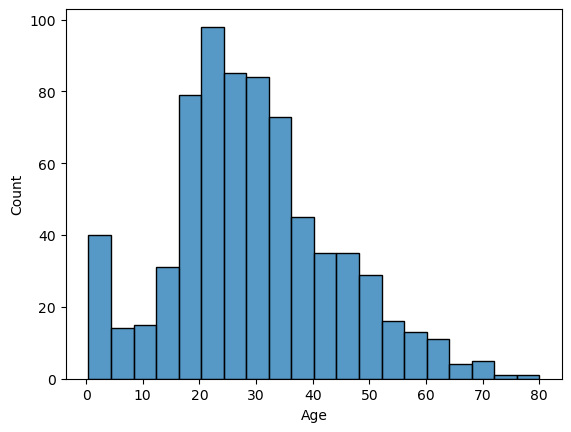

In [83]:
sns.histplot(x='Age',data=titanic_train)

# Missing Data

We want to fill in missing age data instead of just dropping the missing age data rows. to do this is by filling in the mean age of all the passengers. However we can check the average age by passenger class and fill average age by the class.

<Axes: xlabel='Pclass', ylabel='Age'>

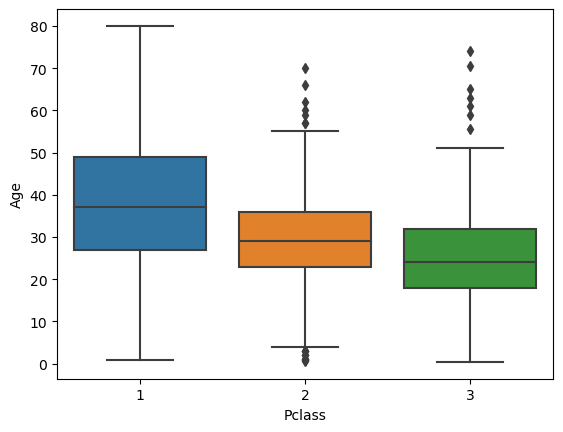

In [21]:
sns.boxplot(x='Pclass',y='Age',data=titanic_train)

<Axes: >

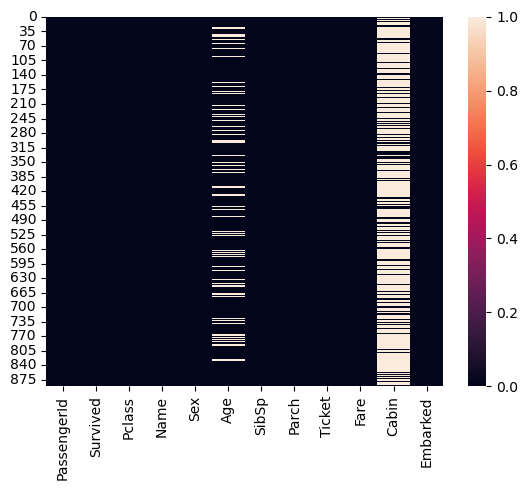

In [7]:
sns.heatmap(titanic_train.isnull())

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [26]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

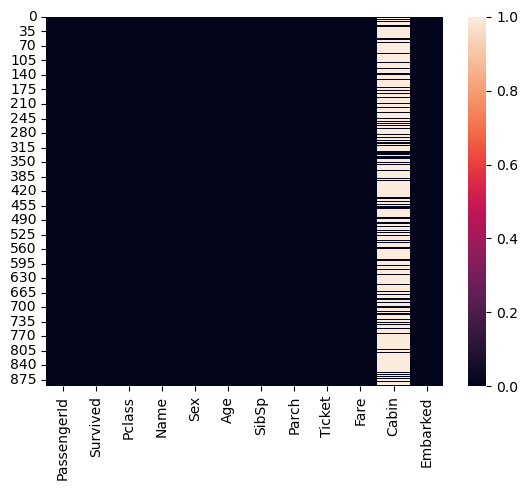

In [27]:
sns.heatmap(titanic_train.isnull())

In this data, Cabin column have maximum or to much null values are present which is more than 600.                               we preferred drop the Cabin column.

In [28]:
titanic_train.drop('Cabin',axis=1,inplace=True)

In [29]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<Axes: >

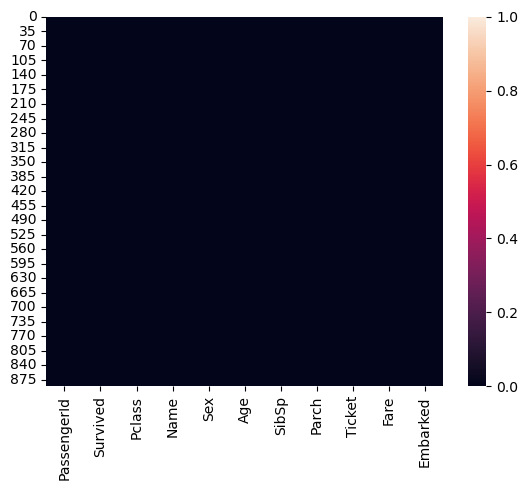

In [30]:
sns.heatmap(titanic_train.isnull())